# CH2

## Downlaod Data from pandas_datareader

In [19]:
#-*- coding: utf-8 -*-
import datetime
import pandas as pd
# import pandas.io.data as web # python 2.7
from pandas_datareader import data as web # python 3.X
import matplotlib.pyplot as plt
# from pandas.tools.plotting import scatter_matrix # python 2.7
from pandas.plotting import scatter_matrix # python 3.X

def download_stock_data(file_name, company_code, year1, month1, date1, year2, month2, date2):
    start = datetime.datetime(year1, month1, date1)
    end = datetime.datetime(year2, month2, date2)
    df = web.DataReader("%s.KS" % (company_code), "yahoo", start, end)

    df.to_pickle(file_name)

    return df

## Load stock data into Dataframe and check data

In [23]:
def load_stock_data(file_name):
    df = pd.read_pickle(file_name)
    return df

#download_stock_data('lg.data','066570',2015,1,1,2015,11,30)
download_stock_data('samsung_2010.data','005930',2010,1,1,2015,11,30)
#download_stock_data('hanmi.data','128940',2015,1,1,2015,11,30)

df = load_stock_data('samsung_2010.data')
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,16180.0,16000.0,16060.0,16180.0,11950800.0,5.854249
2010-01-05,16580.0,16300.0,16520.0,16440.0,27925850.0,5.948323
2010-01-06,16820.0,16520.0,16580.0,16820.0,22948850.0,6.085815
2010-01-07,16820.0,16260.0,16820.0,16260.0,22107950.0,5.883196
2010-01-08,16420.0,16120.0,16400.0,16420.0,14777550.0,5.941086


In [24]:
df.count()

High         1468
Low          1468
Open         1468
Close        1468
Volume       1468
Adj Close    1468
dtype: int64

In [25]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1468.000000,1468.000000,1468.000000,1468.000000,1.468000e+03,1468.000000
mean,23447.193460,22978.487738,23225.653951,23213.433243,1.518076e+07,65.983788
std,4984.668959,4917.142242,4955.751410,4952.143869,6.759823e+06,85.269943
min,13940.000000,13440.000000,13680.000000,13600.000000,0.000000e+00,5.325992
25%,18270.000000,17780.000000,18020.000000,18015.000000,1.050711e+07,12.944941
50%,25220.000000,24680.000000,24910.000000,24970.000000,1.351140e+07,28.894010
75%,27200.000000,26760.000000,27025.000000,27000.000000,1.821320e+07,68.928574
max,31680.000000,30960.000000,31640.000000,31520.000000,6.380345e+07,291.512238


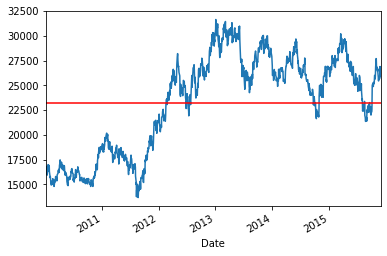

In [32]:
df['Open'].plot()
plt.axhline(df['Open'].mean(),color='red')
plt.show()

In [28]:
df.quantile([.25,.5,.75,1]) # 사분위수 체크

,High,Low,Open,Close,Volume,Adj Close
0.25,18270.0,17780.0,18020.0,18015.0,10507112.5,12.944941
0.50,25220.0,24680.0,24910.0,24970.0,13511400.0,28.894010
0.75,27200.0,26760.0,27025.0,27000.0,18213200.0,68.928574
1.00,31680.0,30960.0,31640.0,31520.0,63803450.0,291.512238


## 히스토그램

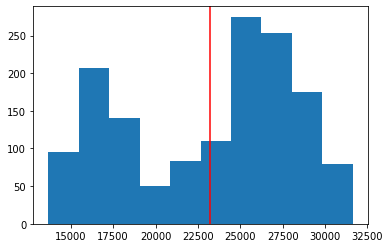

Bin : 13680, Frequency = 95
Bin : 15476, Frequency = 207
Bin : 17272, Frequency = 140
Bin : 19068, Frequency = 50
Bin : 20864, Frequency = 83
Bin : 22660, Frequency = 110
Bin : 24456, Frequency = 275
Bin : 26252, Frequency = 253
Bin : 28048, Frequency = 175
Bin : 29844, Frequency = 80


In [43]:
(n, bins, patched) = plt.hist(df['Open'])
# df['Open'].plot(kind='kde')
plt.axvline(df['Open'].mean(),color='red')
plt.show()

for index in range(len(n)):
    print("Bin : %0.f, Frequency = %0.f" % (bins[index],n[index]))

## 산점도 행렬

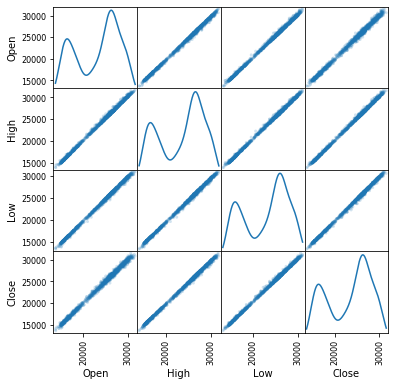

In [37]:
scatter_matrix(df[['Open','High','Low','Close']], alpha=0.2, figsize=(6, 6), diagonal='kde')
plt.show()

## 상자그림

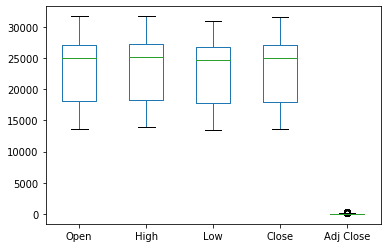

In [38]:
df[['Open','High','Low','Close','Adj Close']].plot(kind='box')
plt.show()